In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('Cell_Data.csv')
print(data.shape)

(683, 11)


In [3]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [6]:
data['Class'].describe()

count    683.000000
mean       2.699854
std        0.954592
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class, dtype: float64

<BarContainer object of 683 artists>

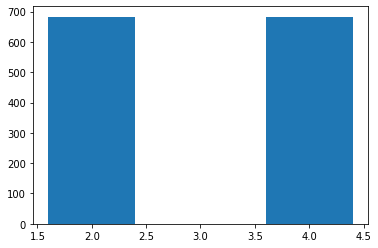

In [7]:
plt.bar(data["Class"],len(data))

In [8]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data["Class"]=lb.fit_transform(data["Class"])

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [22]:
rf_pred=rf.predict(x_test)

In [23]:
rf.score(x_train,y_train)

1.0

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Random Forest Accuracy =',accuracy_score(y_test,rf_pred))

Random Forest Accuracy = 0.9473684210526315


In [25]:
confusion_matrix(y_test,rf_pred)

array([[103,   4],
       [  5,  59]])

In [27]:
print(classification_report(y_test,rf_pred))

precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [28]:
max_ones=y_test.sum()
print(max_ones)
rf_probas=rf.predict_proba(x_test)
rf_probas=rf_probas[:,1]
rf_points=[y for _,y in sorted(zip(rf_probas,y_test),reverse=True)]
x_scale=np.arange(0,len(x_test)+1)
rf_y=np.append([0],np.cumsum(rf_points))
mid=int(0.5*len(x_test))

64


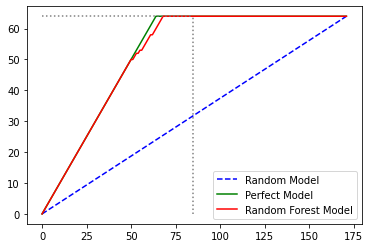

In [33]:
plt.plot([0,len(x_test)],[0,max_ones],color='blue',linestyle='dashed',label='Random Model')
plt.plot([0,max_ones,len(x_test)],[0,max_ones,max_ones],color='green',linestyle='solid',label='Perfect Model')
plt.plot(x_scale,rf_y,color='red',label='Random Forest Model')
plt.plot([mid,mid],[0,rf_y[mid]],color='grey',linestyle='dotted')
plt.plot([0,mid],[rf_y[mid],rf_y[mid]],color='grey',linestyle='dotted')
plt.legend()

In [35]:
print(100*rf_y[mid]/max_ones)

100.0
